## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd

In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
x,y=mnist['data'],mnist['target']

In [4]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [6]:
x.shape

(70000, 784)

In [7]:
y.shape  

(70000,)

In [8]:
%matplotlib inline

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [10]:
some_digit=x.iloc[3601]
some_digit_image=some_digit.values.reshape(28,28)   #let reshape it to plot it

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

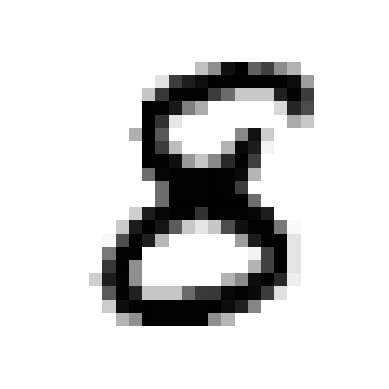

In [11]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
plt.axis("off")

In [12]:
y[3601]

'8'

In [13]:
x_train,x_test=x[:60000],x[60000:]

In [14]:
y_train,y_test=y[:60000],y[60000:]

In [15]:
import numpy as np
shuffle_index=np.random.permutation(60000)
x_train,y_train=x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

## Creating a 2 detector

In [16]:
y_train=y_train.astype(np.int8)
y_test=y_test.astype(np.int8)
y_train_2=(y_train==2)
y_test_2=(y_test==2)

In [17]:
y_train_2

44847     True
15173    False
41846    False
43887    False
183      False
         ...  
52030    False
4916     False
52869     True
1371     False
18038     True
Name: class, Length: 60000, dtype: bool

In [18]:
y_test_2

60000    False
60001     True
60002    False
60003    False
60004    False
         ...  
69995     True
69996    False
69997    False
69998    False
69999    False
Name: class, Length: 10000, dtype: bool

In [19]:
from sklearn.linear_model import LogisticRegression

In [26]:
clasifier=LogisticRegression(tol=0.1)

In [27]:
clasifier.fit(x_train,y_train_2)

LogisticRegression(tol=0.1)

In [28]:
clasifier.predict([some_digit])

C:\Users\rupal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([False])

In [29]:
from sklearn.model_selection import cross_val_score
a=cross_val_score(clasifier,x_train,y_train_2,cv=3,scoring="accuracy")

In [30]:
a.mean()

np.float64(0.9792333333333335)

Here Accuracy is 97%.